The tutorial is adapted from: 
- https://www.kaggle.com/legoritma/building-autoencoders-in-keras-notebook
- https://www.datacamp.com/community/tutorials/autoencoder-classifier-python

# Let's build the simplest possible autoencoder

In [1]:
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

c:\users\debora.nozza.disco\appdata\local\continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [17]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)

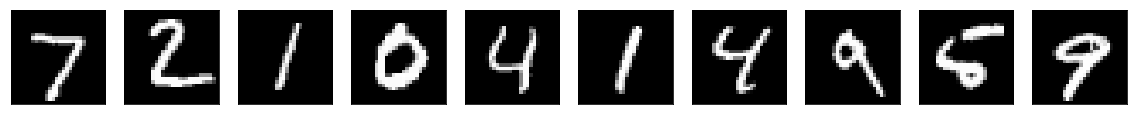

In [18]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1971 - val_loss: 0.1908
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1881 - val_loss: 0.1827
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1808 - val_loss: 0.1762
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1746 - val_loss: 0.1704
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1693 - val_loss: 0.1655


In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

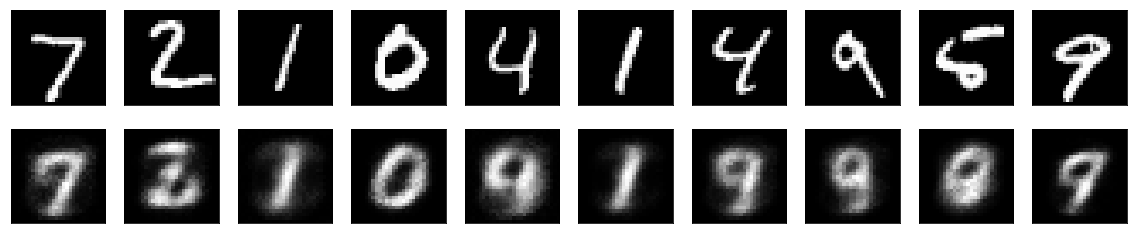

In [21]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder

In [22]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [23]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3560 - val_loss: 0.2642
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2600 - val_loss: 0.2542
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2463 - val_loss: 0.2380
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2297 - val_loss: 0.2208
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2117 - val_loss: 0.2008


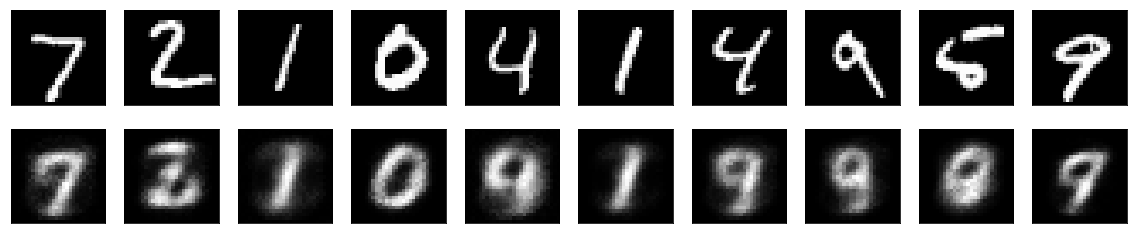

In [24]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Train the Model for prediction

In [42]:
from keras.layers import Flatten
num_classes = 10

#encoded = Flatten()(encoded)
den = Dense(64, activation='relu')(encoded)
out = Dense(num_classes, activation='softmax')(den)

full_model = Model(input_img,out)


In [43]:
import keras 
for l1,l2 in zip(full_model.layers[:3],autoencoder.layers[0:3]):
    l1.set_weights(l2.get_weights())
for layer in full_model.layers[0:3]:
    layer.trainable = True


In [44]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
classify_train = full_model.fit(x_train, y_binary, batch_size=64,epochs=5,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.6909 - acc: 0.7756
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3606 - acc: 0.8932
Epoch 3/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2842 - acc: 0.9159
Epoch 4/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2444 - acc: 0.9281
Epoch 5/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2159 - acc: 0.9373


In [45]:
predicted_classes = full_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)